#Graduate Admission Prediction

**Context**                                                   
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

The **parameters** included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose Strength ( out of 5 )
5. Letter of Recommendation Strength ( out of 5 )
6. Undergraduate GPA ( out of 10 )
7. Research Experience ( either 0 or 1 )
8. Chance of Admit ( ranging from 0 to 1 )

[Source](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)

### Importing libs and data

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Admission_Predict_Ver1.1.csv",index_col=0)

In [69]:
df_.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72


### Exploring the data

In [70]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [71]:
df_.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [72]:
df_.shape

(500, 8)

In [73]:
df_.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Modelling Preprocessing

In [74]:
#Splitting data into Dependent and Independent Variables
X = df_.iloc[:,:-1]
y = df_.iloc[:,-1]

In [75]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [76]:
#Performing Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104,
                                   test_size=0.25)

### Neural Network Development

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [78]:
model = Sequential()
model.add(Dense(16, input_dim=7, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                128       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [79]:
train_hist = model.fit(X_train,y_train,batch_size=64,verbose=1,epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
6/6 [==============================] - 1s 30ms/step - loss: 0.8807 - mse: 0.8807 - val_loss: 0.5689 - val_mse: 0.5689
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6017 - mse: 0.6017 - val_loss: 0.3988 - val_mse: 0.3988
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4401 - mse: 0.4401 - val_loss: 0.2663 - val_mse: 0.2663
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3427 - mse: 0.3427 - val_loss: 0.1669 - val_mse: 0.1669
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2825 - mse: 0.2825 - val_loss: 0.0981 - val_mse: 0.0981
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2096 - mse: 0.2096 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1653 - mse: 0.1653 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1751 - mse: 0.1751 -

### Plotting loss and error to understand progress of training

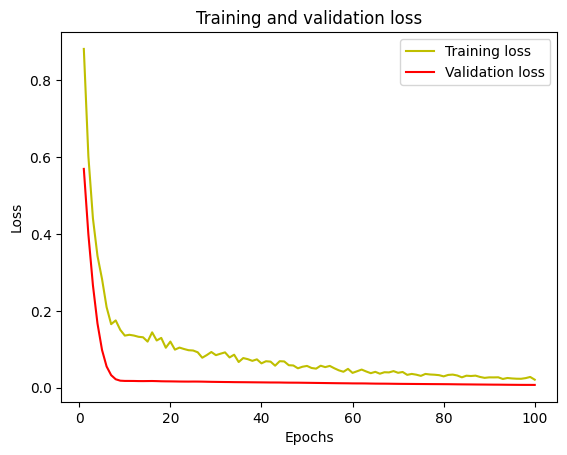

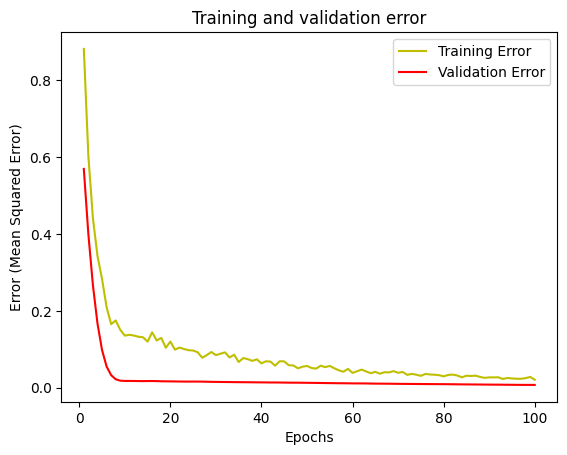

In [80]:
#plot the training and validation accuracy and loss at each epoch
loss = train_hist.history['loss']
val_loss = train_hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


err = train_hist.history['mse']  #Use accuracy if acc doesn't work
val_err = train_hist.history['val_mse']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, err, 'y', label='Training Error')
plt.plot(epochs, val_err, 'r', label='Validation Error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error (Mean Squared Error)')
plt.legend()
plt.show()

In [81]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


### Try Predicting your admission chances 😉

In [82]:
my_input1 = X[0].reshape(1,-1)
print("The chances of admissions are about ",model.predict(my_input1)[0])

1/1 [==============================] - 0s 32ms/step
The chances of admissions are about  [0.94948]


#**By Kartavya Desai**